In [26]:
# https://quantumcomputing.stackexchange.com/questions/24050/how-to-implement-a-exponential-of-a-hamiltonian-but-non-unitary-matrix-in-qisk

# control gate: https://qiskit.org/documentation/stubs/qiskit.circuit.ControlledGate.html

# circuit https://www.nature.com/articles/s41598-022-17660-8
import numpy as np
from numpy.linalg import eig, svd

A = np.array([
    [11, 5, -1, -1],
    [5, 11, 1, 1],
    [-1, 1, 11, -5],
    [-1, 1, -5, 11],
    ]).astype('complex')

In [7]:
vals,vecs=eig(A)
print('E-value:', vals)
# print('E-vector', v)

E-value: [16.+0.j  8.+0.j  4.+0.j 16.+0.j]


In [14]:
u, s, vh = np.linalg.svd(A, full_matrices=False)
s

array([16., 16.,  8.,  4.])

# "Our algorithms will generally assume that the singular values of A lie between 1/κ and 1; equivalently κ−2I ≤ A†A ≤ I"

https://arxiv.org/pdf/0811.3171

but in our case k = 16/4 = 2 => all the eigenvalues are out of the scope

*original* - how the algorithm works itself;

*with_error* - experiments with error

In [10]:
import json
  
# Opening JSON file
f = open('random_data.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
# print(data)

In [73]:
all_mse = []
all_abs = []
all_op = []
all_depth = []
for example, mode in data.items():
    mses = []
    abss = []
    ops = []
    depths = []
    for _, value in mode.items():
        mses.append(value['mse'])
        abss.append(value['abs'])
        ops.append(value['depth'])
        depths.append(value['op_num'])
    all_mse.append(mses)
    all_abs.append(abss)
    all_op.append(ops)
    all_depth.append(depths)
    # mses = [value['mse'] for _, value in data.items()]

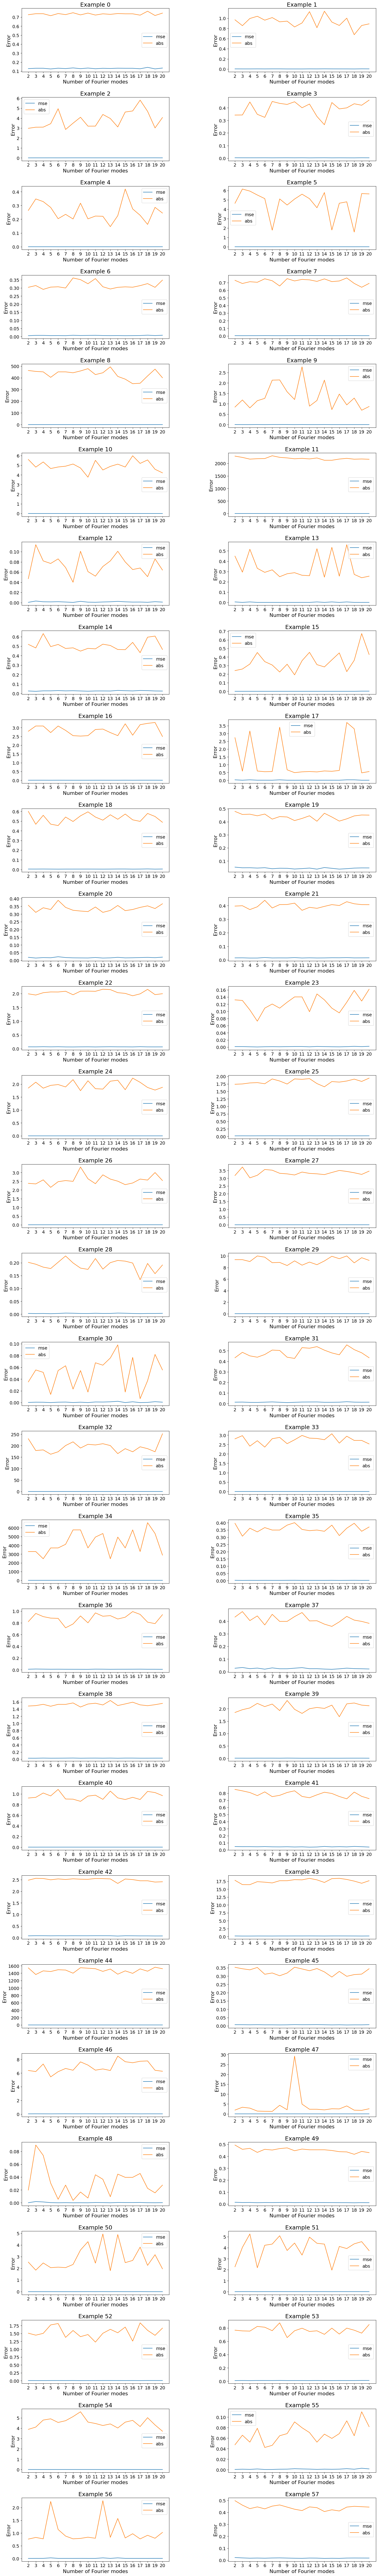

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,150))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, (abs, mse) in enumerate(zip(all_abs, all_mse)):
    plt.subplot(30, 2, i+1)
    plt.plot(np.arange(2, 21), mse, label="mse")
    plt.plot(np.arange(2, 21), abs, label="abs")
    plt.title('Example ' + str(i), fontsize=18)
    plt.xlabel('Number of Fourier modes', fontsize=16)
    plt.ylabel('Error', fontsize=16)
    plt.xticks(np.arange(2, 21, step=1), fontsize=14)
    plt.yticks(fontsize=14)
    # plt.yticks(np.arange(0, 1, step=0.1))
    plt.legend(fontsize=14)
    # plt.show()

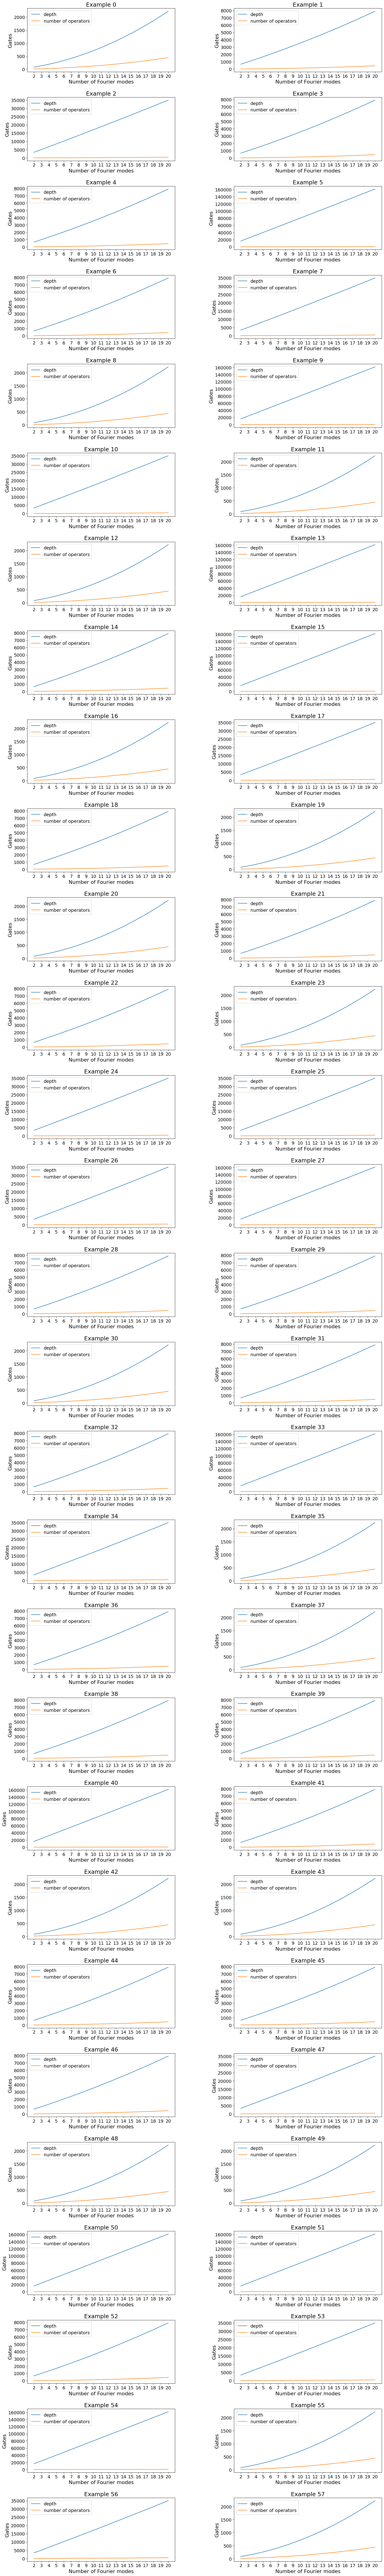

In [83]:
plt.figure(figsize=(20,150))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, (depth, ops) in enumerate(zip(all_depth, all_op)):
    plt.subplot(30, 2, i+1)
    plt.plot(np.arange(2, 21), depth, label="depth")
    plt.plot(np.arange(2, 21), ops, label="number of operators")
    plt.title('Example ' + str(i), fontsize=18)
    plt.xlabel('Number of Fourier modes', fontsize=16)
    plt.ylabel('Gates', fontsize=16)
    plt.xticks(np.arange(2, 21, step=1), fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    # plt.show()

In [120]:
x = [ 1.35044964,  1.38421578,  2.21167247, -1.27322581, -0.30190158,  0.20735965, 1.75597734,  0.53144531,  1.55320479,  0.44549418,  1.59326047,
     -0.21551799, 0.76433512,  0.16899638, -0.22992428, -0.09196832]
a = [0.26307734, 0.17908617, 0.31375128,0.13714193,0.12946907,0.03940397,0.22361294,0.04761165,0.24668189,0.36872896,0.3414727, 0.08072196,	 0.38563275,0.37824943,0.14714865,0.27841614]
print(np.linalg.norm(np.array(a)))

1.0000000043537471


# TODO:
* normalize BOTH vecors
* works only for Frob. norm

* how regularization works

* find confidential interval
* why accuracy does not depend on mode number
* how nomber of qubits increases depending on number of modes? (see what happens when the elements have normal distribution - accuracy should depend on vector-x smoothness)

# IN PROGRESS:
* see what happens with matrices with det -> 0

# DONE 
* **in which norms quantum computations work?**
The Born rule describes the norm-squared correspondence between amplitudes and probabilities

In [114]:
# https://math.stackexchange.com/questions/197390/generating-a-random-singular-matrices-using-matlab
# k - rank 
k = 8
n = 8
R = np.random.random((n, k))
# Generate a random matrix $R$ of dimension $n\times k$.
T=1
A=R*R**T
print(A.shape)
np.linalg.det(A)

(8, 8)


-0.001234611708787185

## Norms
seems like for both vectors apply (b / np.linalg.norm(b))**2

In [187]:
b = [-2.42209354e+04,1.39211839e+03,-1.18335869e+02,5.01717464e+02,1.16083303e+01,-1.55753717e+03,1.88356399e+04,9.47732430e-01]
b = (b / np.linalg.norm(b))**2
b.sort()
print(b)
# print(np.linalg.norm(b))
# print(sum([el for el in b]))
print(np.round(b, 3))


b = [0.265625, 0.037109375, 0.314453125, 0.27490234375, 0.072265625, 0.01806640625, 0.009765625, 0.0078125]
print(np.linalg.norm(b))
b = (b / np.linalg.norm(b))**2
# print(sum([el for el in b]))
print(np.linalg.norm(b))
b.sort()
print(np.round(b, 3))

[9.49402982e-10 1.42435624e-07 1.48017109e-05 2.66071002e-04
 2.04847868e-03 2.56422392e-03 3.75007424e-01 6.20098857e-01]
[0.    0.    0.    0.    0.002 0.003 0.375 0.62 ]
0.5020865771345822
0.5679065284321146
[0.    0.    0.001 0.005 0.021 0.28  0.3   0.392]


# Singular matrices

In [129]:
import json
import os  
# Opening JSON file
f = open('singular\\random_data.json')
data = json.load(f)
config = configparser.ConfigParser()
config.sections()
config.read('singular\\random_data.ini')

In [130]:
all_mse = []
all_abs = []
all_op = []
all_depth = []
for example, mode in data.items():
    mses = []
    abss = []
    ops = []
    depths = []
    for _, value in mode.items():
        mses.append(value['mse'])
        abss.append(value['abs'])
        ops.append(value['depth'])
        depths.append(value['op_num'])
    all_mse.append(mses)
    all_abs.append(abss)
    all_op.append(ops)
    all_depth.append(depths)

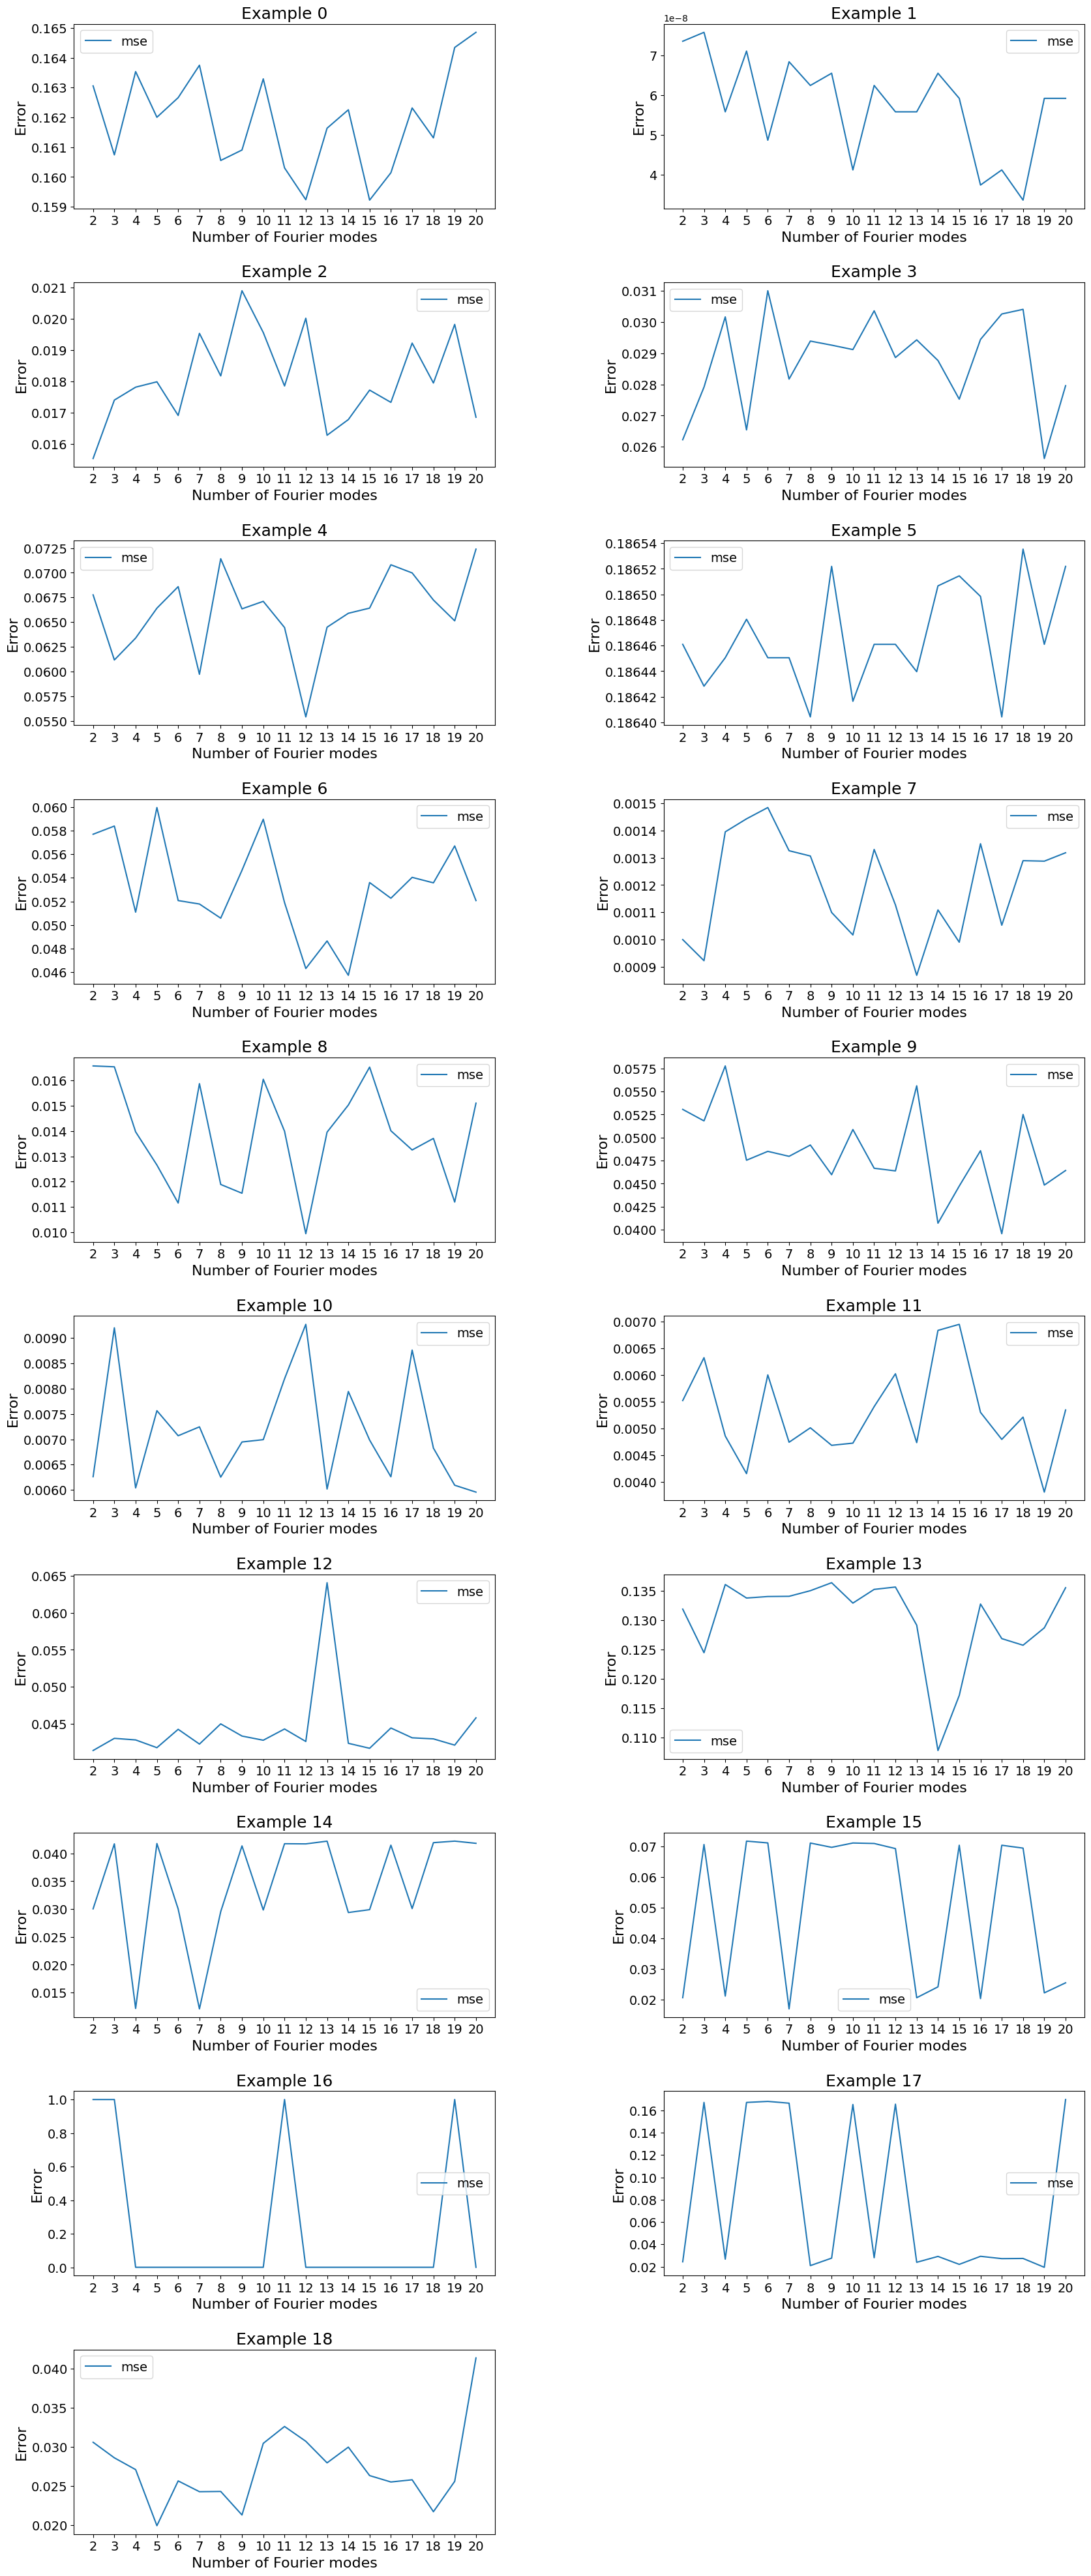

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, (abs, mse) in enumerate(zip(all_abs, all_mse)):
    plt.subplot(10, 2, i+1)
    plt.plot(np.arange(2, 21), mse, label="mse")
    # plt.plot(np.arange(2, 21), abs, label="abs")
    plt.title('Example ' + str(i), fontsize=18)
    plt.xlabel('Number of Fourier modes', fontsize=16)
    plt.ylabel('Error', fontsize=16)
    plt.xticks(np.arange(2, 21, step=1), fontsize=14)
    plt.yticks(fontsize=14)
    # plt.yticks(np.arange(0, 1, step=0.1))
    plt.legend(fontsize=14)
    # plt.show()

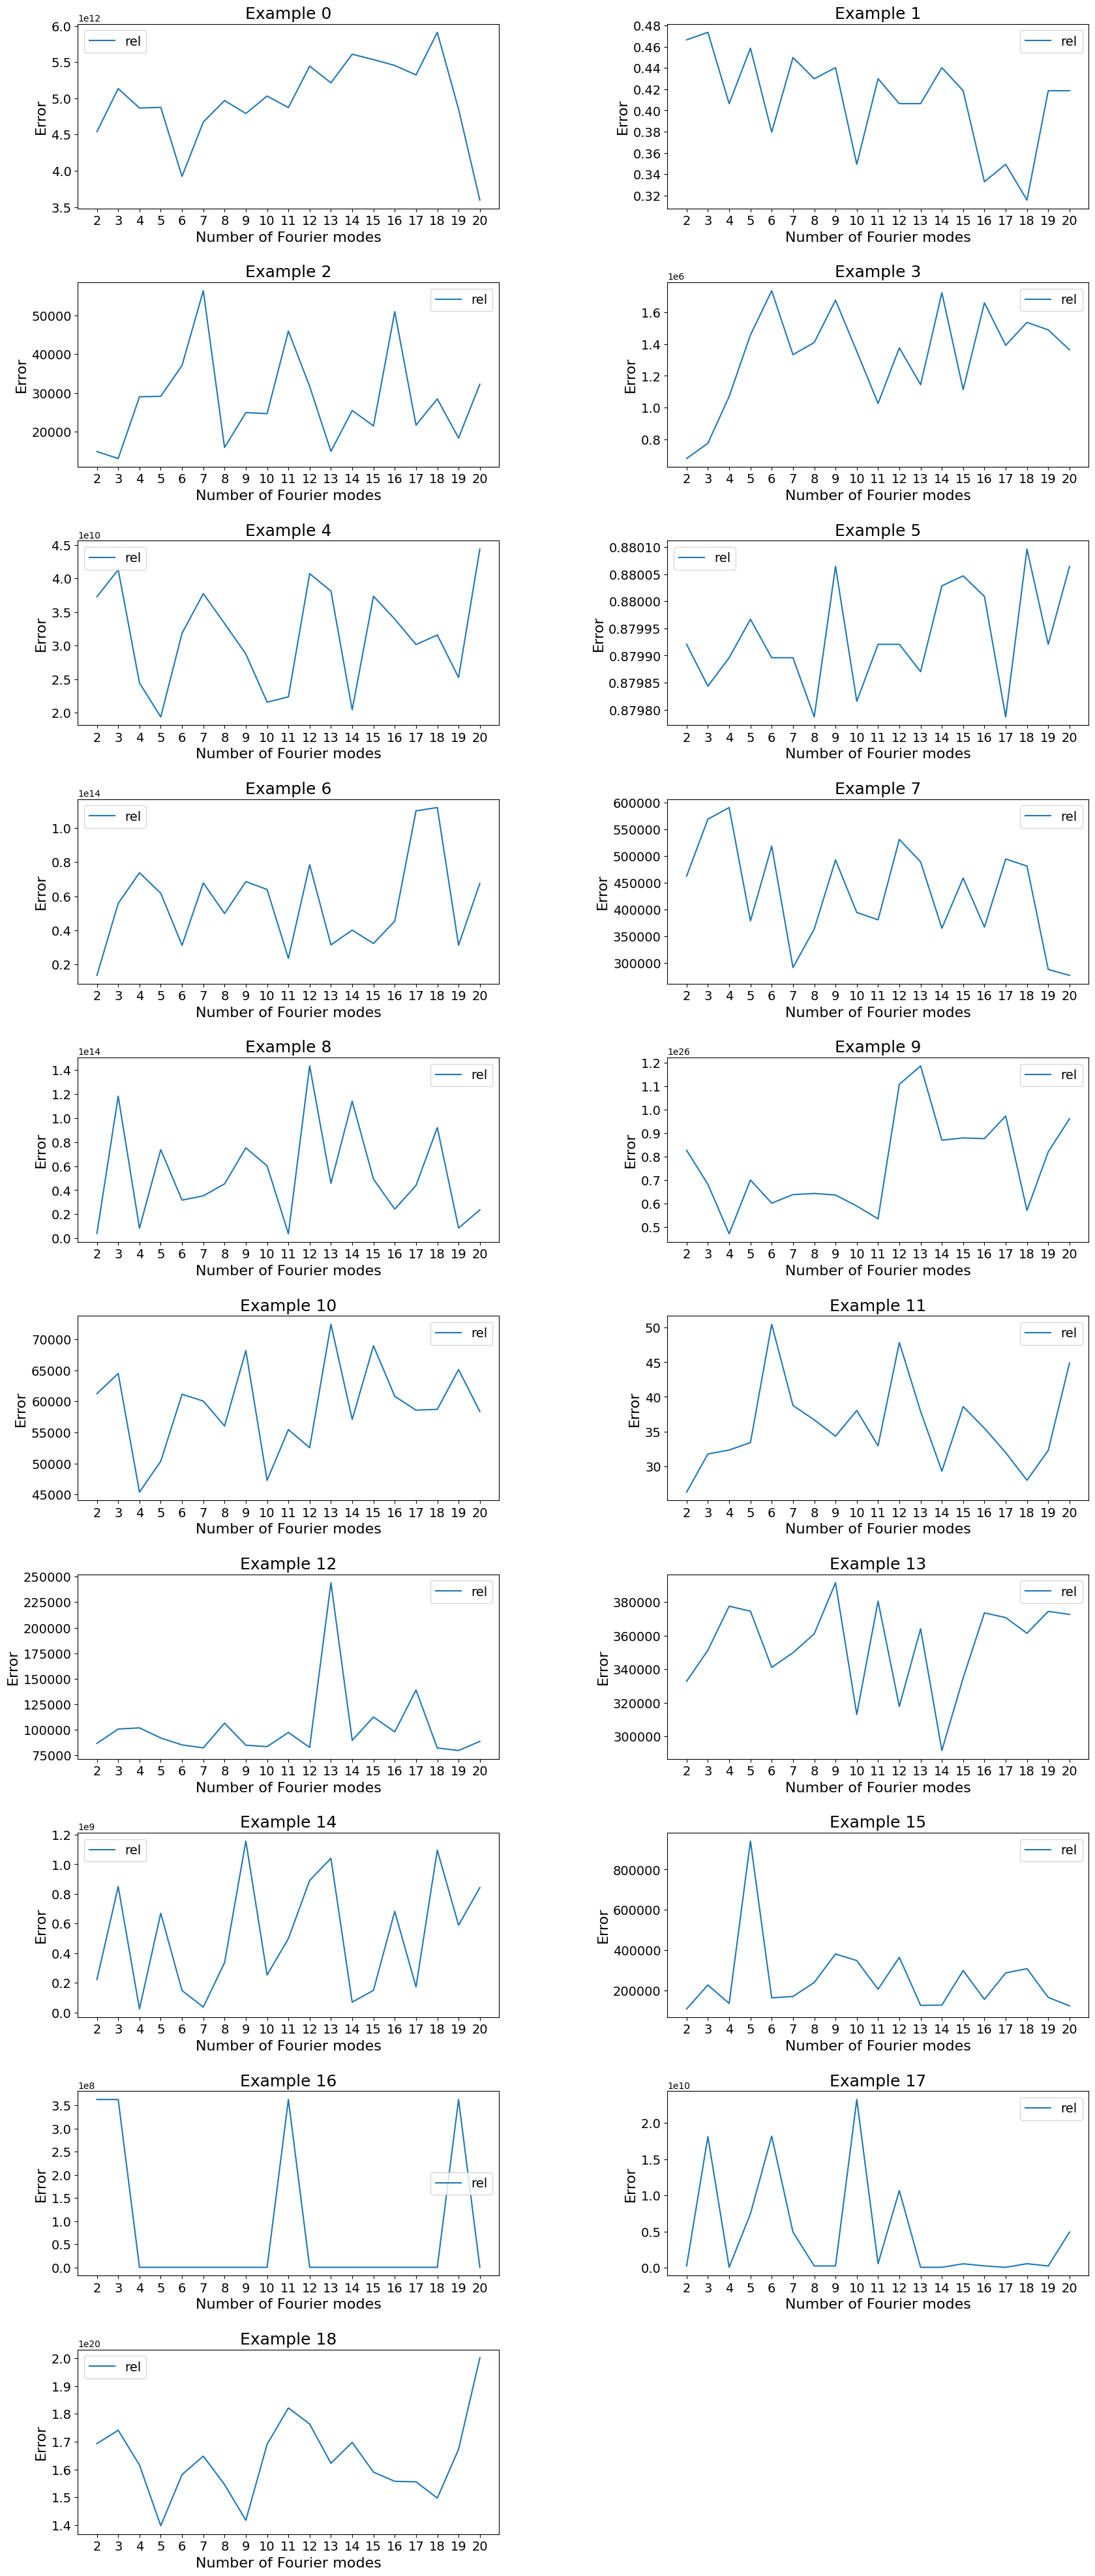

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, (abs, mse) in enumerate(zip(all_abs, all_mse)):
    plt.subplot(10, 2, i+1)
    # plt.plot(np.arange(2, 21), mse, label="mse")
    plt.plot(np.arange(2, 21), abs, label="rel")
    plt.title('Example ' + str(i), fontsize=18)
    plt.xlabel('Number of Fourier modes', fontsize=16)
    plt.ylabel('Error', fontsize=16)
    plt.xticks(np.arange(2, 21, step=1), fontsize=14)
    plt.yticks(fontsize=14)
    # plt.yticks(np.arange(0, 1, step=0.1))
    plt.legend(fontsize=14)
    # plt.show()